In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle
import pygenstability as pgs

from matplotlib.pyplot import figure
from pygenstability import plotting
from scipy.linalg import block_diag

from mcf import MCF

In [10]:
root_fig = '/home/tc/OneDrive/Software/MCF/figures/'
plt.rcParams.update({'font.size': 20})

# Apply MCF

In [3]:
partitions = [
    np.asarray([1, 2, 3]),
    np.asarray([1, 1, 2]),
    np.asarray([1, 2, 2]),
    np.asarray([1, 2, 1]),
    np.asarray([1, 1, 1]),
]
filtration_indices = np.asarray([1,2,3,4,5],dtype=int)

In [4]:
# initialise MCF object
mcf = MCF()
mcf.load_data(partitions,filtration_indices)

In [5]:
# plot Sankey
fig = mcf.plot_sankey()

In [6]:
# build filtration and compute PH
mcf.build_filtration()
mcf.compute_persistence()

Constructing filtration with GUDHI ...


100%|██████████| 5/5 [00:00<00:00, 3733.58it/s]

Computing persistence with GUDHI ... 


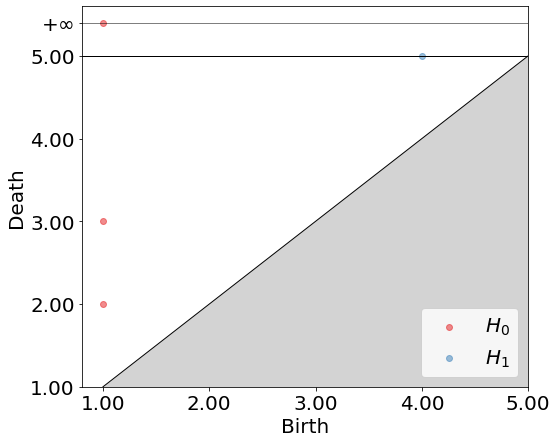

In [11]:
# Plot persistence diagram
ax = mcf.plot_persistence_diagram()
plt.savefig(root_fig +'toyexample_PD.pdf',bbox_inches='tight')

In [8]:
# compute Betti numbers
betti_0, betti_1, betti_2 = mcf.compute_bettis()

# compute size of partitions
s_partitions = mcf.compute_partition_size()

# compute persistent hierarchy
h, h_bar = mcf.compute_persistent_hierarchy()

# compute persistent conflict
c_1, c_2, c = mcf.compute_persistent_conflict()

Average persistent hierarchy: 0.75


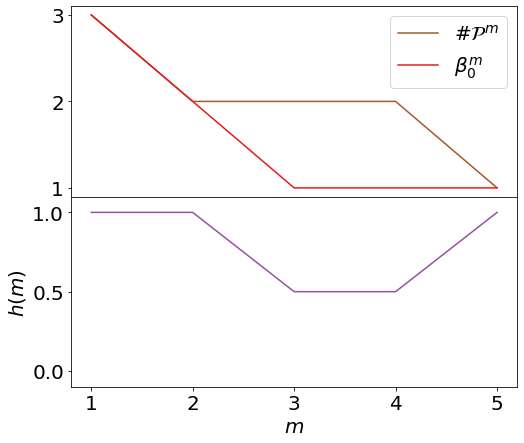

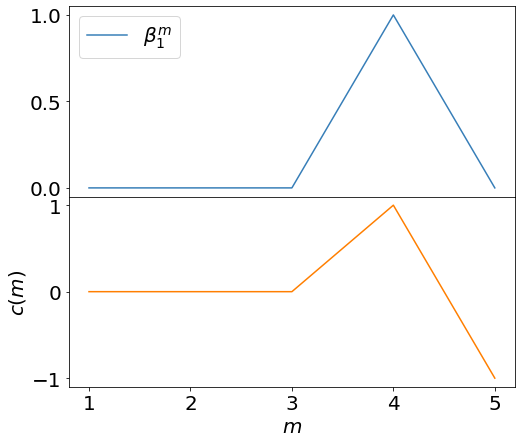

In [12]:
colormap = plt.cm.Set1.colors

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(filtration_indices,s_partitions, label = r'$\#\mathcal{P}^m$', color=colormap[6])
ax1.plot(filtration_indices,betti_0, label = r'$\beta_0^m$', color=colormap[0])
ax1.set(xticks=[])

ax1.legend()
ax2.plot(filtration_indices,h, label = r'$h(m)$',c=colormap[3])
ax2.set_ylabel(r'$h(m)$')
ax2.set(xlabel=r'$m$',ylim=(-0.1,1.1))
plt.savefig(root_fig +'toyexample_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')

import pandas as pd

def moving_average(x, w):
    return np.roll(
        np.asarray(pd.Series(x).rolling(window=w, win_type="triang").mean()),
        -int(w / 2),
    )

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]

ax1.plot(filtration_indices,betti_1, label = r'$\beta_1^m$', color=colormap[1])

ax1.set(xticks=[])

ax1.legend()
ax2.plot(filtration_indices,c,c=colormap[4])
ax2.set_ylabel(r'$c(m)$')#, color="green")
ax2.set(xlabel=r'$m$')#,ylim=(-0.1,1.1))
plt.savefig(root_fig +'toyexample_conflict.pdf', dpi=fig.dpi,bbox_inches='tight')